# Assignment 2
## Numerical Optimization & Large Scale Linear Algebra

### Theofanis Nitsos, p3352325

## Load the data

In the data the , symbol was replaced with .


In [1]:
import pandas as pd

In [2]:
azip = pd.read_excel('data.xlsx', sheet_name='azip',header=None)
dzip = pd.read_excel('data.xlsx', sheet_name='dzip',header=None)
dtest = pd.read_excel('data.xlsx', sheet_name='dtest',header=None)
testzip = pd.read_excel('data.xlsx', sheet_name='testzip',header=None)

/opt/homebrew/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/opt/homebrew/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/opt/homebrew/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/opt/homebrew/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [206]:
dtest

,0,1,2,3,4,5,6,7,8,9,...,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
0,9,6,3,6,6,0,0,0,6,9,...,7,5,2,0,4,3,9,4,0,1


In [199]:
dzip

,0,1,2,3,4,5,6,7,8,9,...,1697,1698,1699,1700,1701,1702,1703,1704,1705,1706
0,6,5,4,7,3,6,3,1,0,1,...,8,0,5,1,9,8,9,7,9,8


In [205]:
testzip

,0,1,2,3,4,5,6,7,8,9,...,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.0,-1.000,-1.0,-1.0,...,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.0
1,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.0,-1.000,-1.0,-1.0,...,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.0
2,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.0,-1.000,-1.0,-1.0,...,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.0
3,-1.0,-1.0,-0.593,-1.0,-1.000,-1.000,-1.0,-1.000,-1.0,-1.0,...,-1.000,-0.885,-0.980,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.0
4,-1.0,-1.0,0.700,-1.0,-1.000,-1.000,-1.0,-1.000,-1.0,-1.0,...,-0.766,-0.280,0.078,-1.0,-1.0,-1.0,-1.0,-0.031,-0.534,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,-1.0,-1.0,-1.000,-1.0,-0.867,-0.641,-1.0,-0.308,-1.0,-1.0,...,-1.000,-0.400,-0.978,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.0
252,-1.0,-1.0,-1.000,-1.0,-1.000,-0.812,-1.0,-1.000,-1.0,-1.0,...,-1.000,-0.998,-0.109,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.0
253,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.0,-1.000,-1.0,-1.0,...,-1.000,-1.000,0.360,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.0
254,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.0,-1.000,-1.0,-1.0,...,-1.000,-1.000,-0.381,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.0


## Normalise the data

In [28]:
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler(feature_range=(-1.0, 1.0))
azip = normalizer.fit_transform(azip)
azip = normalizer.transform(azip)

testzip = normalizer.fit_transform(testzip)
testzip = normalizer.transform(testzip)

### Pre-process the data

Combine and match the images (256 dimension vectors) with the corresponding labels both for the train and test dataset

In [8]:
import numpy as np
import pandas as pd
from scipy.linalg import svd

# Combine azip and dzip into a single dataframe for easier processing
data = azip.transpose()
data['labels'] = dzip.iloc[0]

grouped = data.groupby(['labels'])

# Group the data by the digit labels

test_data = testzip.transpose()
test_data['labels'] = dtest.iloc[0]


## Question 1 & 2: SVD for the first k singular vectors

We group the images (256 dimension vectors) with their corresponding labels to the class_matrix vector that is appended to the class_matrices list that contains the data for each of the different 10 digits.

We use SVD on the 256 x [number of examples] matrix to get the corresponding U, S and V matrices

The U matrix containing the left eigenvalues is stored in class_bases vector. We only keep the k first, thus the matrix has dimension 256 x k dimensions

Then using the classify_image function we calculate the projection of the image onto the class basis; where basis is 256 x k dimension. Essentially we calculate $ U_k \; U_k^T \; image $ where image is the 256 vector for classification. After that we calculate the residual using the Euclidean norm and keep the minimum residual.

In [9]:
# Number of singular vectors to use for the basis
k = 20

# Compute SVD for each class and store the bases
class_matrices = []
class_bases = {}
for label, group in grouped:
    class_matrix = group.iloc[:, :-1].values.T  # Transpose to get shape (256, num_samples)
    class_matrices.append(class_matrix)
    U, S, Vt = svd(class_matrix, full_matrices=False)
    class_bases[label] = U[:, :k]

# Function to classify a test image
def classify_image(image, class_bases):
    residuals = {}
    for label, basis in class_bases.items():
        # Project the image onto the class basis
        projection = basis @ (basis.T @ image)
        # Compute the residual
        residual = np.linalg.norm(image - projection)
        residuals[label] = residual
    # Return the label with the smallest residual
    return min(residuals, key=residuals.get)

In [10]:
# Prepare test images and labels
test_images = test_data.iloc[:, :-1].values.T
test_labels = test_data.iloc[:, -1].values

# Classify test images and compute accuracy
predicted_labels = []
correct = 0
for image, true_label in zip(test_images.T, test_labels):
    predicted_label = classify_image(image, class_bases)
    predicted_labels.append(predicted_label)
    if predicted_label == true_label:
        correct += 1

accuracy = correct / len(test_labels)
print(f"Classification accuracy: {accuracy * 100:.2f}%")

Classification accuracy: 93.97%


## Confusion matrix calculation

To figure out which digits have been missclassified we print the confusion matrix to give us more information on each classification task

[[355   0   2   0   1   0   0   0   0   1]
 [  0 259   0   0   3   0   2   0   0   0]
 [  8   1 179   2   3   0   0   1   4   0]
 [  1   0   4 148   1   8   0   1   2   1]
 [  1   1   0   0 187   1   1   3   0   6]
 [  8   1   2   4   0 140   0   0   2   3]
 [  2   0   0   0   2   2 164   0   0   0]
 [  0   1   1   0   3   0   0 139   0   3]
 [  4   0   2   6   0   1   0   0 149   4]
 [  0   1   0   1   4   0   0   4   1 166]]


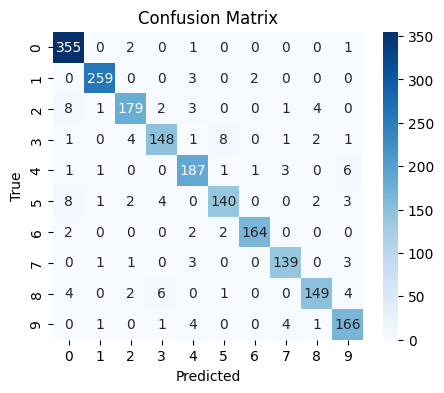

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
conf_matrix = confusion_matrix(test_data['labels'], predicted_labels)

print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Result interpretation
For k = 20 we achieve almost 94% accuracy which is pretty good. 
The most common mistakes are confusing digit 2 with 0, digit 5 with 0 and digit 8 with 3 and digit 4 with 9. 
Trying different values for k the accuracy fluctuates but does not change considerably but the same numbers seem to be the most difficult for our system to classify

## Question 1 & 2
- Tune the algorithm for accuracy of classification. Give a table or graph of the percentage of correctly classified digits as a function of the number of basis vectors
- Check if all digits are equally easy or difficult to classify. Also look at some of the difficult ones, and see that in many cases they are very badly written.

In order to compare the different accuracies and confusion matrices we will calculate the U matrix for k=20 and then use x (where x ranges from 5-20) elements of the U matrix.

In [12]:
# Compute SVD for each class and store the bases
k = 20

class_matrices = []
class_bases = {}
for label, group in grouped:
    class_matrix = group.iloc[:, :-1].values.T  # Transpose to get shape (256, num_samples)
    class_matrices.append(class_matrix)
    U, S, Vt = svd(class_matrix, full_matrices=False)
    class_bases[label] = U[:, :k]

In [13]:
# Function to classify a test image
def classify_image_k(image, class_bases,x):
    residuals = {}
    for label, basis in class_bases.items():
        # Project the image onto the class basis
        basis_k = basis[:, :x]
        projection = basis_k @ (basis_k.T @ image)
        # Compute the residual
        residual = np.linalg.norm(image - projection)
        residuals[label] = residual
    # Return the label with the smallest residual
    return min(residuals, key=residuals.get)

In [14]:
k_list = np.arange(5, 21, 1)

accuracies = {}

for x in k_list:
    # Classify test images and compute accuracy
    predicted_labels = []
    correct = 0
    for image, true_label in zip(test_images.T, test_labels):
        predicted_label = classify_image_k(image, class_bases, x)
        predicted_labels.append(predicted_label)
        if predicted_label == true_label:
            correct += 1
            
    accuracy = correct / len(test_labels)
    accuracies[x]= accuracy
    print(f"Classification accuracy for k = {x}: {accuracy * 100:.2f}%")
    conf_matrix = confusion_matrix(test_data['labels'], predicted_labels)
    print(conf_matrix)

Classification accuracy for k = 5: 90.28%
[[351   0   2   0   1   1   3   0   0   1]
 [  0 254   0   0   8   0   2   0   0   0]
 [  8   1 175   2   3   0   3   1   5   0]
 [  4   0   3 144   0  12   0   1   2   0]
 [  0   3   3   0 167   3   4   5   2  13]
 [  8   0   0  12   1 131   0   4   2   2]
 [  2   1   2   0   2   3 160   0   0   0]
 [  0   2   0   2   1   0   0 137   1   4]
 [  4   3   2   9   2   5   1   3 132   5]
 [  0   1   0   0   7   0   0   6   2 161]]
Classification accuracy for k = 6: 90.53%
[[349   0   2   0   1   1   5   0   0   1]
 [  0 258   0   0   4   0   2   0   0   0]
 [ 10   1 174   2   2   0   2   2   5   0]
 [  2   0   3 143   0  12   0   1   3   2]
 [  0   4   2   0 169   4   3   9   1   8]
 [  7   1   0  13   1 132   0   1   2   3]
 [  4   0   3   0   3   0 159   0   1   0]
 [  0   1   0   1   3   1   0 138   1   2]
 [  4   2   2   8   2   4   0   2 134   8]
 [  0   2   1   0   4   0   0   7   2 161]]
Classification accuracy for k = 7: 91.68%
[[351   2   

### Plot of the percentage of correctly classified digits as a function of the number of basis vectors

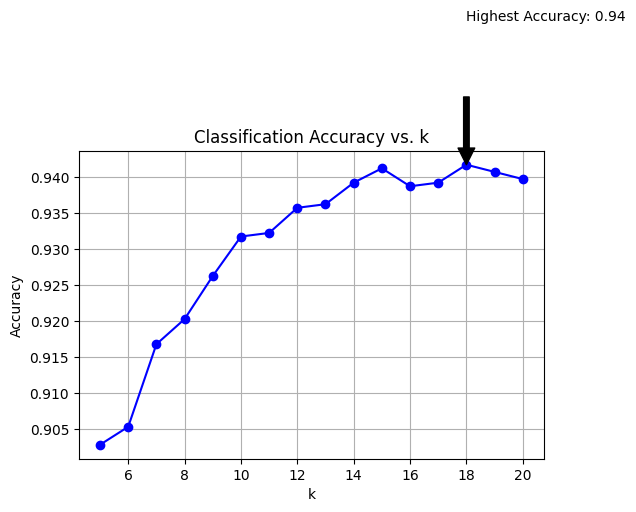

In [24]:
import matplotlib.pyplot as plt

# Extract k values and their corresponding accuracies
k_values = list(accuracies.keys())
accuracy_values = list(accuracies.values())

# Find the k with the highest accuracy
max_accuracy = max(accuracy_values)
best_k = k_values[accuracy_values.index(max_accuracy)]

# Plotting the results
plt.figure(figsize=(6, 4))
plt.plot(k_values, accuracy_values, marker='o', linestyle='-', color='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Classification Accuracy vs. k')
plt.grid(True)

# Annotate the point with the highest accuracy
plt.annotate(f'Highest Accuracy: {max_accuracy:.2f}', xy=(best_k, max_accuracy), xytext=(best_k, max_accuracy + 0.02),
             arrowprops=dict(facecolor='black', shrink=0.5))
plt.show()


## Result interpretation
For k = 18 we achieve the highest accuracy, 94,17% which is pretty close to k values around 18. 
The most common mistakes appear to be the same for most k values and are confusing digits 
- 2 with 0
- 5 with 0
- 8 with 3 and
- 4 with 9

## Visualise handwritten digits

Image 1


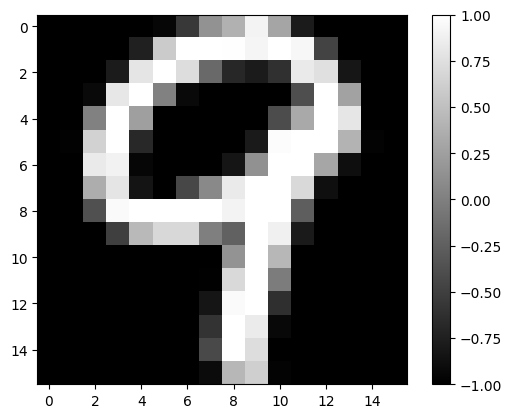

Image 2


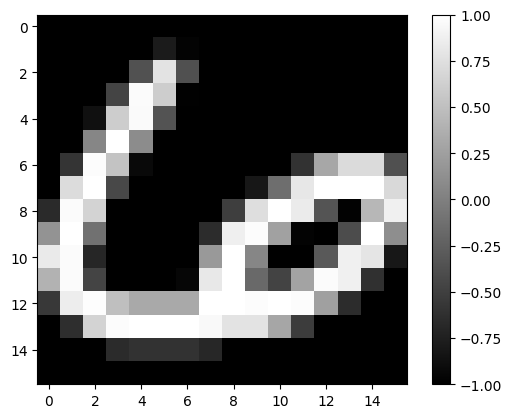

Image 3


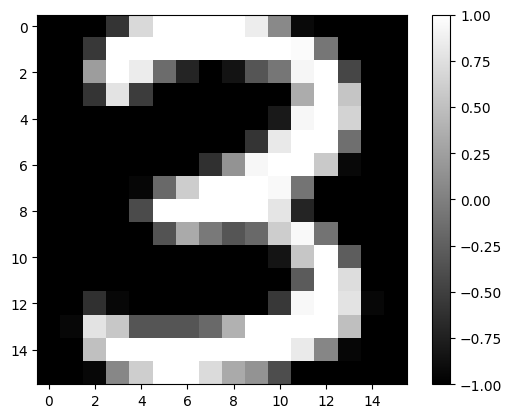

Image 4


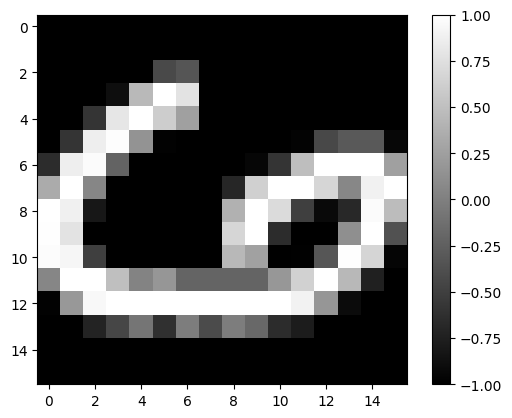

Image 5


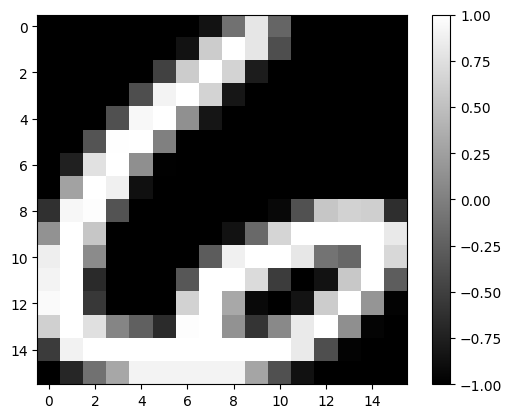

Image 6


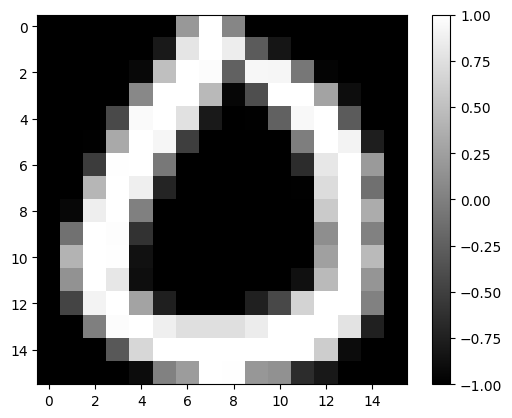

Image 7


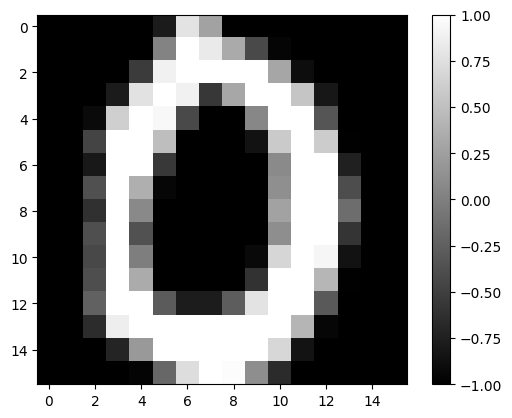

Image 8


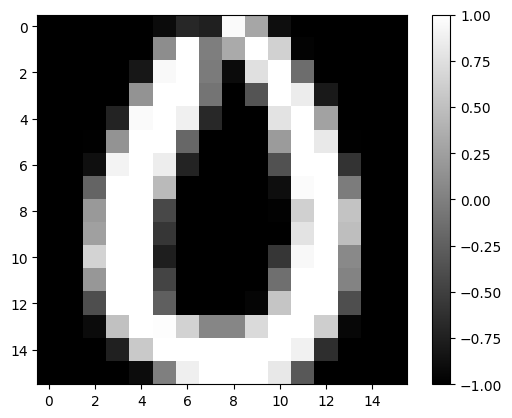

Image 9


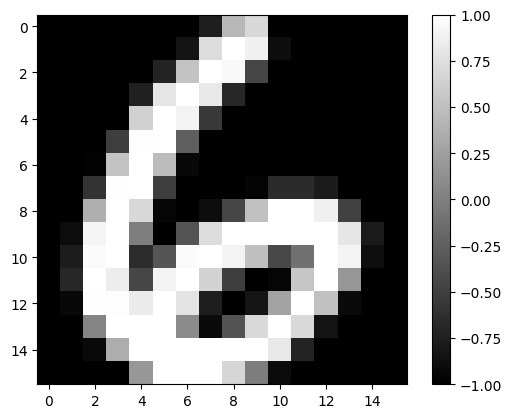

Image 10


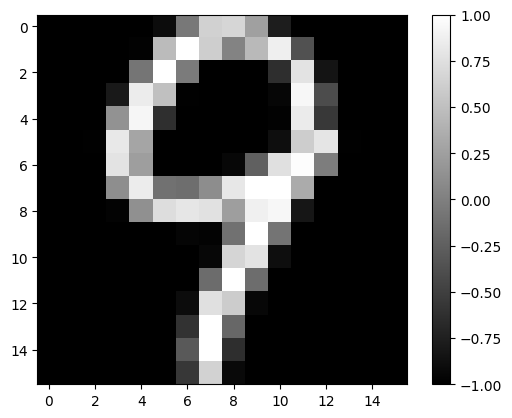

Image 11


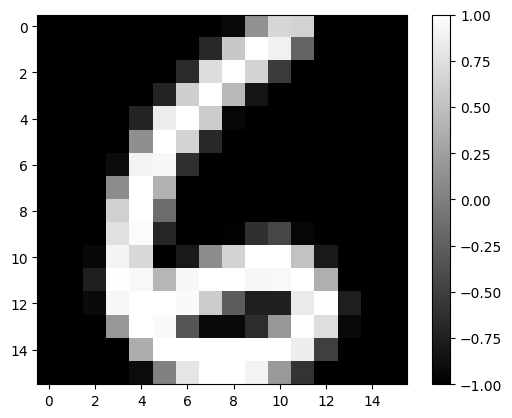

Image 12


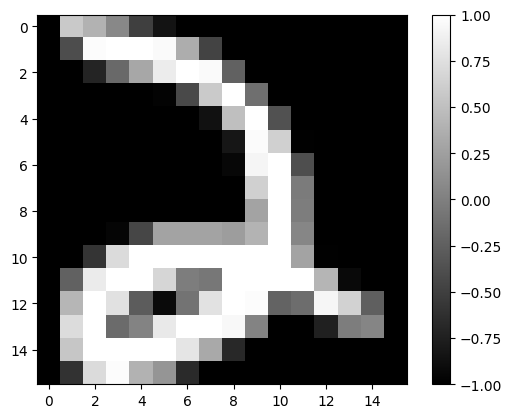

Image 13


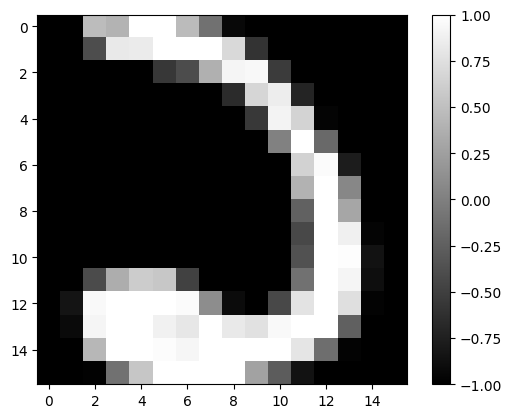

Image 14


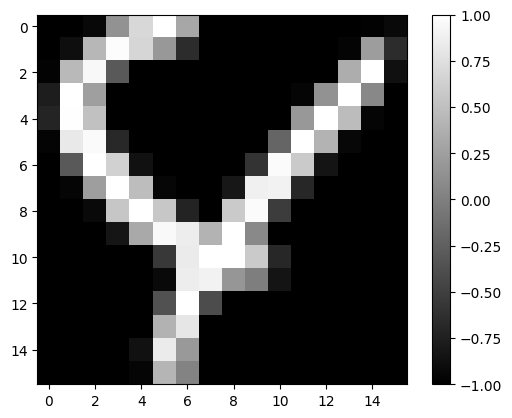

Image 15


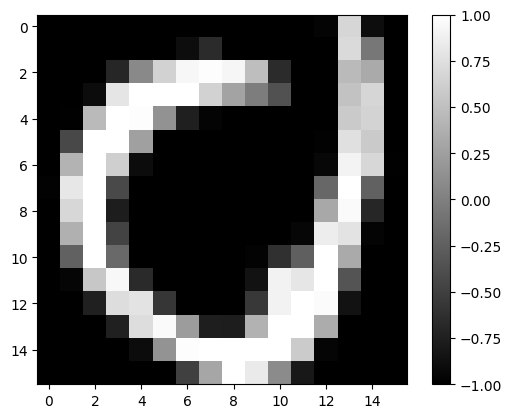

Image 16


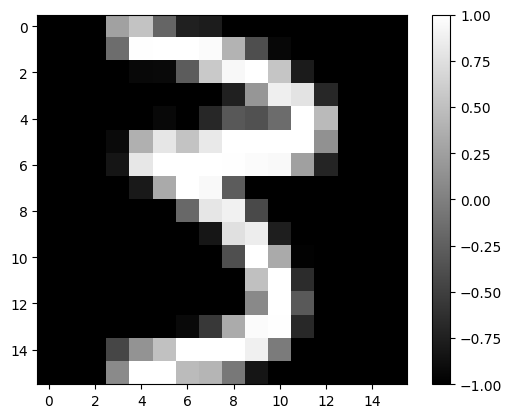

Image 17


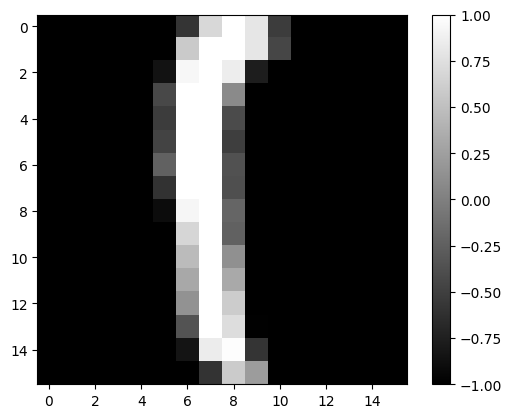

Image 18


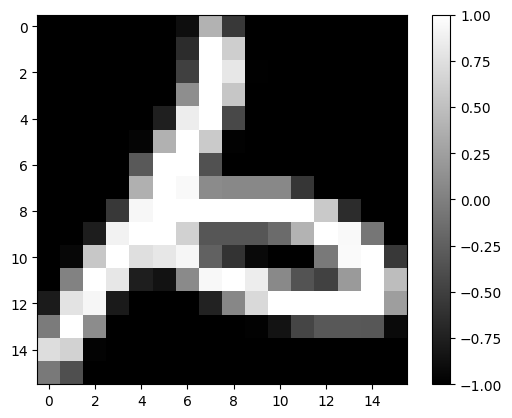

Image 19


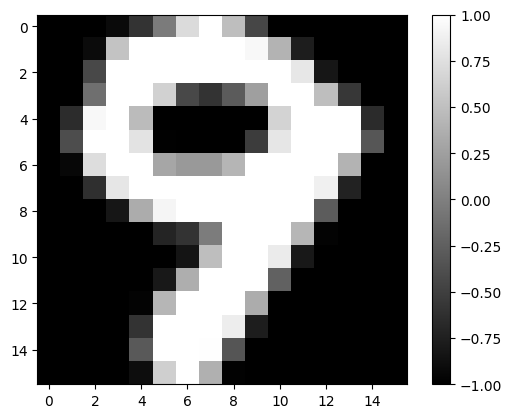

Image 20


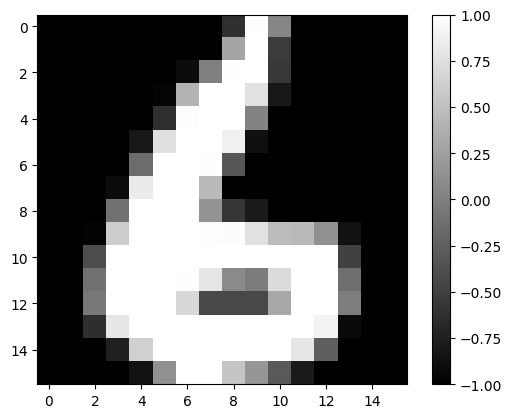

In [361]:
# Function to display a single 16x16 image
def show_image(vector):
    # Reshape the vector into a 16x16 array
    image = vector.reshape((16, 16))
    
    # Display the image using matplotlib
    plt.imshow(image, cmap='gray')
    plt.colorbar()
    plt.show()

# Display the first 20 images
for i in range (0, 20):
    print(f"Image {i+1}")
    show_image(testzip.iloc[:,i].values)

## Comments

Displaying the first 20 images indeed some digits are really hard to recognize since they are rotated or poorly designed.

## Question 3

Check the singular values of the different classes. Is it motivated to use different numbers of basis vectors for different classes? If so, perform a few experiments to find out if it really pays off to use fewer basis vectors in one or two of the classes

- we will print and compare the singular values of the digits that are commonly confused

In [378]:
# Print the singular values of 2 comparing to 0
print('Singular values of 0 and 2')
print(class_bases[(0,)][0:1])
print(class_bases[(2,)][0:1])

# Print the singular values of 5 comparing to 0
print('Singular values of 0 and 5')
print(class_bases[(0,)][0:1])
print(class_bases[(5,)][0:1])

# Print the singular values of 8 comparing to 3
print('Singular values of 8 and 3')
print(class_bases[(8,)][0:1])
print(class_bases[(3,)][0:1])

Singular values of 0 and 2
[[ 0.09524001  0.01013981  0.00398899 -0.04677815  0.00674618 -0.00056676
   0.00282251 -0.01612817  0.01493878 -0.00853177  0.00143765 -0.03149498
   0.02605047 -0.00904644  0.0259169  -0.00851009  0.0205543  -0.02516537
   0.00304414  0.0263868 ]]
[[-0.10072799  0.00281737  0.01117817 -0.00421945  0.00910914 -0.00792747
   0.0204797   0.00554012  0.02785111  0.0051306   0.00147056 -0.00450142
  -0.00340469  0.00853223  0.00966783  0.00451006  0.02482694 -0.03346788
  -0.00283476  0.02415144]]
Singular values of 0 and 5
[[ 0.09524001  0.01013981  0.00398899 -0.04677815  0.00674618 -0.00056676
   0.00282251 -0.01612817  0.01493878 -0.00853177  0.00143765 -0.03149498
   0.02605047 -0.00904644  0.0259169  -0.00851009  0.0205543  -0.02516537
   0.00304414  0.0263868 ]]
[[-0.09764077 -0.01879866  0.00018345  0.02546429 -0.01614718  0.04195225
  -0.03034942 -0.01561014 -0.00827847 -0.01402426  0.00963067  0.00317366
   0.01005185  0.02253984  0.00324462 -0.0234638

## Comments

Taking into account the results above as well as the confusion matrices produced for different number of basis vector, there was no apparent advantage in using fewer basis vector in some of the classes. The errors might well be poor illustrations of the digits (as seen above)

## Optional question/Task 1
TWO-STAGE ALGORITHM WITH SVD
In order to save operations in the test phase, implement a two-stage algorithm: In the first stage compare the unknown digit only to the first singular vector in each class. If for one class the residual is significantly smaller than for the others, classify as that class. Otherwise perform the algorithm above. Is it possible to get as good results for this variant? How frequently is the second stage unnecessary?

As indicated we implement a two stage classification.
- In the first stage only the first singular vector is used. If the minimum residual is less than the threshold * the 2nd minimum residual then it is classified using only the first stage
- Else we use all k basis vectors to classify the vector.

Classification accuracy: 94.17%
In 2007 classification tasks the digit was classified at the first stage 200 times


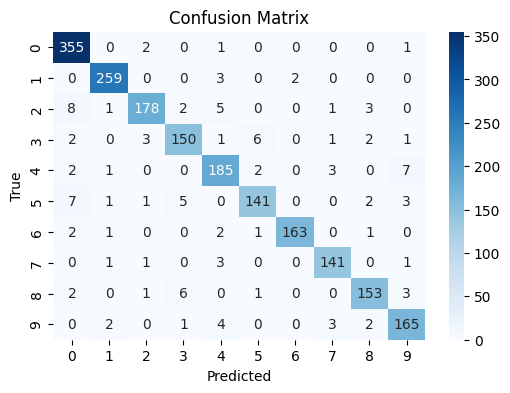

In [25]:
# Compute SVD for each class and store the bases
k=18

class_bases = {}
first_singular_vectors = {}
for label, group in grouped:
    class_matrix = group.iloc[:, :-1].values.T  # Transpose to get shape (256, num_samples)
    U, S, Vt = svd(class_matrix, full_matrices=False)
    class_bases[label] = U[:, :k]
    first_singular_vectors[label] = U[:, 0:1]

# Function to classify a test image using the two-stage algorithm
def classify_image_two_stage(image, first_singular_vectors, class_bases, threshold=0.5):
    # Stage 1: Compare to the first singular vector of each class
    first_stage_residuals = {}
    for label, first_singular_vector in first_singular_vectors.items():
        projection = first_singular_vector @ (first_singular_vector.T @ image)
        residual = np.linalg.norm(image - projection)
        first_stage_residuals[label] = residual

    # Find the class with the smallest residual in the first stage
    min_label = min(first_stage_residuals, key=first_stage_residuals.get)
    min_residual = first_stage_residuals[min_label]
    
    # If the smallest residual is significantly smaller than the others, classify as that class
    if all(min_residual < threshold * residual for label, residual in first_stage_residuals.items() if label != min_label):
        return min_label, 1
    
    # Stage 2: Perform the full algorithm
    residuals = {}
    for label, basis in class_bases.items():
        projection = basis @ (basis.T @ image)
        residual = np.linalg.norm(image - projection)
        residuals[label] = residual
    
    return min(residuals, key=residuals.get), 0

# Classify test images and compute accuracy
predicted_labels = []
correct = 0
counter = 0
counter_first_stage = 0
for image, true_label in zip(test_images.T, test_labels):
    predicted_label, count_first_stage = classify_image_two_stage(image, first_singular_vectors, class_bases)
    predicted_labels.append(predicted_label)
    counter += 1
    counter_first_stage = count_first_stage + counter_first_stage
    if predicted_label == true_label:
        correct += 1

accuracy = correct / len(test_labels)
print(f"Classification accuracy: {accuracy * 100:.2f}%")

print(f"In {counter} classification tasks the digit was classified at the first stage {counter_first_stage} times")

# Compute the confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Comments
- The classification accuracy remains unchanged, indicating that for some of the examples the first basis vector is enough. 
- The threshold is set to 0.5. For this value 200 out of the 2007 (~10%) cases required only the first stage classification.
- Increasing the threshold leads to slightly reduced accuracy but increases the digits classified using only the first stage
- Decreasing the threshold essentially leads to the case used in Question 1-2 where all basis vectors were used for classification essentially disabling the first stage

## Optional question/Task 2

In [ ]:
import numpy as np
from scipy.linalg import svd

# Function to compute finite difference approximation
def compute_derivatives(image):
    p_x = (np.roll(image, -1, axis=1) - np.roll(image, 1, axis=1)) / 2
    p_y = (np.roll(image, -1, axis=0) - np.roll(image, 1, axis=0)) / 2
    return p_x, p_y

# Stack columns to form a vector
def stack_columns(image):
    return image.flatten()

# Example transformation: translation in x and y
def translation_derivatives(image):
    p_x, p_y = compute_derivatives(image)
    return stack_columns(p_x), stack_columns(p_y)

# Implement other transformations similarly...

# Tangent distance computation
def tangent_distance(p, e, Tp, Te):
    A = np.hstack((Tp, -Te))
    b = p - e
    alpha, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)
    return np.linalg.norm(residuals)

# Example usage
# Assuming images is a list of images to classify
for i, img1 in enumerate(images):
    for j, img2 in enumerate(images):
        if i != j:
            p_x1, p_y1 = translation_derivatives(img1)
            p_x2, p_y2 = translation_derivatives(img2)
            # Compute tangent distance between img1 and img2
            dist = tangent_distance(stack_columns(img1), stack_columns(img2), np.array([p_x1, p_y1]).T, np.array([p_x2, p_y2]).T)
            print(f"Distance between image {i} and image {j}: {dist}")


In [391]:
import numpy as np

def compute_derivatives(image, size=16):
    """
    Compute x-derivatives and y-derivatives of a 16x16 image using finite difference approximation.
    """
    image = image.reshape((size, size))
    
    # Compute x-derivatives
    dx = np.zeros_like(image)
    dx[:, :-1] = image[:, 1:] - image[:, :-1]
    
    # Compute y-derivatives
    dy = np.zeros_like(image)
    dy[:-1, :] = image[1:, :] - image[:-1, :]
    
    return dx.ravel(), dy.ravel()


In [498]:
def stack_derivatives(dx, dy):
    """
    Stack the derivatives to form a single vector.
    """
    # Ensure dx and dy are 1D arrays
    dx = dx.ravel()
    dy = dy.ravel()
    return np.hstack((dx, dy))


In [528]:
def tangent_distance(image, class_derivatives, alpha=0.5):
    """
    Compute the tangent distance between the image and class derivatives.
    """
    dx, dy = compute_derivatives(image)
    stacked_image = stack_derivatives(dx, dy)
    
    residuals = {}
    for label, class_derivative in class_derivatives.items():
        class_derivative = class_derivative.reshape(-1, 1)
        projection = class_derivative @ (class_derivative.T @ stacked_image)
        residual = np.linalg.norm(stacked_image - projection)
        residuals[label] = residual
    
    return min(residuals, key=residuals.get)


In [529]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute SVD for each class and store the bases
k = 18
class_bases = {}
first_singular_vectors = {}
class_derivatives = {}

for label, group in grouped:
    class_matrix = group.iloc[:, :-1].values.T  # Transpose to get shape (256, num_samples)
    U, S, Vt = svd(class_matrix, full_matrices=False)
    class_bases[label] = U[:, :k]
    first_singular_vectors[label] = U[:, 0:1]
    
    # Compute derivatives for each class
    dx_sum = np.zeros((256,))
    dy_sum = np.zeros((256,))
    for image in group.iloc[:, :-1].values:
        dx, dy = compute_derivatives(image)
        dx_sum += dx
        dy_sum += dy
    class_derivatives[label] = stack_derivatives(dx_sum, dy_sum)


Classification accuracy using tangent distance: 0.80%


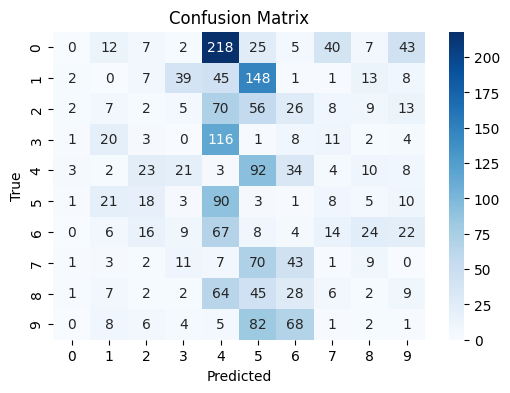

In [530]:
# Function to classify a test image using tangent distance
def classify_image_tangent_distance(image, class_derivatives):
    return tangent_distance(image, class_derivatives)

# Classify test images and compute accuracy
predicted_labels = []
correct = 0
counter = 0

for image, true_label in zip(test_images.T, test_labels):
    predicted_label = classify_image_tangent_distance(image, class_derivatives)
    predicted_labels.append(predicted_label)
    counter += 1
    if predicted_label == true_label:
        correct += 1

accuracy = correct / len(test_labels)
print(f"Classification accuracy using tangent distance: {accuracy * 100:.2f}%")

# Compute the confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()